Iteration 0, value of gradient: [[16938.92376013 13978.07634653 16842.05108056 ... 17667.21335496
  18167.33419907 20371.94668356]
 [12814.0274133  10095.81924544  9699.6107987  ... 20317.66018627
  20669.99335062 10825.64245688]
 [12684.51625374 18930.03601924 32992.61722911 ... 28176.98936101
  12060.49884005 11593.67069241]
 ...
 [13772.20602027 21203.65097517 39289.22278886 ... 15552.8857885
  21518.64240042 20193.5677514 ]
 [18090.28805691 36195.09188218 35661.81438089 ... 10703.8210218
  10621.20613498 19825.79350361]
 [13206.94879955 20190.53186953 30315.0987899  ... 14385.54873475
  18717.86516837 22379.02931199]]
Iteration 1, value of gradient: [[-1.69387543e+09 -1.39779366e+09 -1.68418826e+09 ... -1.76670367e+09
  -1.81671525e+09 -2.03717431e+09]
 [-1.28138992e+09 -1.00957183e+09 -9.69951373e+08 ... -2.03174570e+09
  -2.06697867e+09 -1.08255343e+09]
 [-1.26843894e+09 -1.89298467e+09 -3.29922874e+09 ... -2.81767075e+09
  -1.20603782e+09 -1.15935548e+09]
 ...
 [-1.37720683e+09 

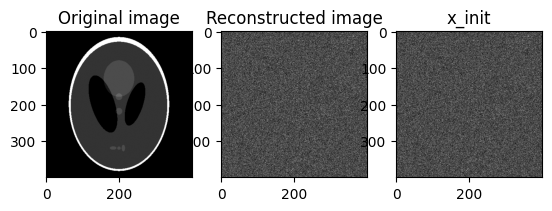

'\nplt.figure()\nplt.imshow(np.log(1 + np.abs(masked_kspace_shepp_shifted)), cmap=\'gray\') # np.log to compress the dynamic range\nplt.colorbar()\nplt.title("Magnitude of Complex Image")\n\nplt.figure()\nplt.imshow(np.angle(masked_kspace_shepp_shifted), cmap=\'twilight\', vmin=-np.pi, vmax=np.pi)\nplt.colorbar()\nplt.title("Phase of Complex Image")\n\nplt.figure()\nplt.imshow(masked_reconstructed)\n\nplt.show()\n'

In [ ]:
#%load_ext autoreload

import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
from MAP.masks import SimpleMask, BernoulliMask
from MAP.map_tv_minimize import MAPEstimator


'''
def create_random_mask(shape, acceleration=4, center_fraction=0.1, seed=None):
    """
    Create a 2D random undersampling mask (Cartesian along rows).
    
    Parameters:
    - shape: tuple (H, W) of the image/k-space
    - acceleration: undersampling factor (e.g. 4 means 25% sampled)
    - center_fraction: fraction of low-freq lines to always keep
    - seed: random seed for reproducibility

    Returns:
    - mask: binary np.array with 1s where sampled, 0s elsewhere
    """
    if seed is not None:
        np.random.seed(seed)

    height, width = shape

    # Always keep low frequencies in the center
    num_low_freqs = int(height * center_fraction)
    center_start = (height - num_low_freqs) // 2
    center_end = center_start + num_low_freqs

    # Initialize mask
    mask = np.zeros((height, width), dtype=np.float32)

    # Select lines to sample outside the center
    num_lines = int(height / acceleration)
    prob = np.ones(height)
    prob[center_start:center_end] = 0  # already included

    candidate_lines = np.where(prob > 0)[0]
    sampled_lines = np.random.choice(candidate_lines, size=num_lines - num_low_freqs, replace=False)

    # Set sampled lines
    mask[sampled_lines, :] = 1
    mask[center_start:center_end, :] = 1  # keep center

    return mask
'''

# load iamge
shepp_logan = ski.data.shepp_logan_phantom()

# create mask (in the F domain of course)
column_mask = SimpleMask(2).mask_columns(shepp_logan)
row_mask = SimpleMask(3).mask_rows(shepp_logan)
bernoulli_mask = BernoulliMask(0.5, seed=30).generate(shepp_logan.shape)

# the 'actual' measurement
y = bernoulli_mask * np.fft.fft2(shepp_logan)

# x_init options
x_init = np.fft.ifft2(bernoulli_mask * np.fft.fft2(shepp_logan)).real
#x_init = np.zeros_like(np.fft.ifft2(y).real)

# init the MAP
map_estimator = MAPEstimator(bernoulli_mask, 1e-3, 0.05, 1e-2, 0.2, 50)

img_reconstruct = map_estimator.subgradient_descent(y, x_init)


'''
kspace_shepp = np.fft.fft2(shepp_logan)
kspace_shepp_shifted = np.fft.fftshift(kspace_shepp) # shift to center the zero frequency for better visualization

reconstructed = np.real(np.fft.ifft2(kspace_shepp))
reconstructed_mag = np.real(np.fft.ifft2(np.abs(kspace_shepp) * np.exp(1j * 0)))
reconstructed_phase = np.real(np.fft.ifft2(np.exp(1j * np.angle(kspace_shepp))))

#masked_kspace_shepp = column_mask(kspace_shepp)
#masked_kspace_shepp_shifted = np.fft.fftshift(masked_kspace_shepp) # shift to center the zero frequency for better visualization

#masked_reconstructed = np.real(np.fft.ifft2(masked_kspace_shepp))
masked_reconstructed_mag = np.real(np.fft.ifft2(np.abs(kspace_shepp) * np.exp(1j * 0)))
masked_reconstructed_phase = np.real(np.fft.ifft2(np.exp(1j * np.angle(kspace_shepp))))
'''

#print(shepp_logan)
#print('------------------------')

#grad_x, grad_y = map_estimator.finite_diff_gradient(shepp_logan)

#print("grad_x - min:", np.min(grad_x), "max:", np.max(grad_x))
#print("grad_y - min:", np.min(grad_y), "max:", np.max(grad_y))

#print("max value in x before fft2:", np.max(np.abs(shepp_logan)))

plt.subplot(1, 3, 1)
plt.title("Original image")
plt.imshow(shepp_logan, cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Reconstructed image")
plt.imshow(np.abs(img_reconstruct), cmap='gray')
plt.subplot(1, 3, 3)
plt.title("x_init")
plt.imshow(np.abs(x_init), cmap='gray')
plt.show()

'''
plt.figure()
plt.imshow(np.log(1 + np.abs(masked_kspace_shepp_shifted)), cmap='gray') # np.log to compress the dynamic range
plt.colorbar()
plt.title("Magnitude of Complex Image")

plt.figure()
plt.imshow(np.angle(masked_kspace_shepp_shifted), cmap='twilight', vmin=-np.pi, vmax=np.pi)
plt.colorbar()
plt.title("Phase of Complex Image")

plt.figure()
plt.imshow(masked_reconstructed)

plt.show()
'''
